# Potato disese prediction

## Table of contents

1. About the dataset

2. Importing libraries

3. Exploratory data analysis

4. Data preprocessing

5. Model building

6. Model evaluation



##About the dataset:

Dataset include images of 'Early_bligh','Late_blight' and 'Healthy' potato leaves. The images are collected from kaggle.

## Importing necessary libraries

1. Using pandas library to load dataset and data processing

2. Numpy to work with arrays and matrices

3. Matplotlib for data visualization

4. Using splitfolders , splitting the data into train, test and validation dataset

5. Using tensorflow and keras libraries for model building and training.


In [ ]:
! pip install split-folders --quiet

In [ ]:
import pandas as pd
import numpy as np
#import splitfolders
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

* Before exploring the dataset splitting the data into training , testing and validation dataset. Since I am using tensorflows "image_dataset_from_directory" to load the images, they donot have an option to split the dataset into three directories, they provide only train and validation split. However, I would like to have train, test and validation split. And using splitfolder function to do the same.

* The splifolders function splits the data with respect to the ratios. Therefore it takes the input dataset directory , the destination directory to save the splitted datasets and the ratio of the split as parameters.

* Here, by passing the dataset directory into splitfolder function, splitting the data into train, test and validation dataset providing the ratio as 80% , 10% and 10% respectively and storing it in a new folder (dataset- foldername).



In [ ]:
splitfolders.ratio("/content/drive/MyDrive/thesis_crop_dis_pre/potato", output="/content/drive/MyDrive/thesis_crop_dis_pre/potato/dataset_pot",
     ratio=(.8, .1, .1))

Copying files: 2152 files [00:51, 42.16 files/s]


Image size and batch size are assigned with default values

In [ ]:
image_size = (256, 256)
batch_size = 32

## Exploratory data analysis

Since its an image data using tensorflows " image_dataset_from_directory " to load the datasets.

Loading the train data passing parameters such as

1. directory, which gives the path of the train data

2. labels is set to 'inferred' ( since i would like to have the same label names from the directory)

3. with lables_mode as int, encoding the labels as integers

4. using a default batch size ( 32 ) to train the data

5. providing default image size (256,256)

6. also providing image channel (color_node) as 3 ie., rgb

7. since we have seperate datasets for validation, here the validation_split is set to None


* image_size and batch_size values could be assigned to a variable since we make use of it again.

In [ ]:
df_train = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/potato/dataset_pot/train',
    labels='inferred',
    label_mode ='int',
    class_names=None,
    color_mode ='rgb',
    batch_size = batch_size,
    image_size = image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
)

Found 1721 files belonging to 3 classes.


* Using dir function to check the builtin properties and methods of df_train


In [ ]:
dir(df_train)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_get_legacy_saved_model_children',
 '_graph',
 '_graph

* Since I have assigned the labels to inferred, we can get the list of class names using the method "class_names" and the names would match the subdirectory names of the data

In [ ]:
classes = df_train.class_names
classes

['Early_blight', 'Healthy', 'Late_blight']

In [ ]:
len(classes)

3

In [ ]:
len(df_train)

54

In [ ]:
54*32

1728

* As the images are loaded as batches, iterating over the first batch of images using take(1) method and retrieving the image and the label batches as tensorflow object. The image batch will 32 images of shape (256 * 256 * 3) and the label batch will have corresponding labels of 32 images

* Using numpy() function to convert tensorflow object to numpy array

In [ ]:
for image, label in df_train.take(2):
  print(image.numpy())
  print(label.numpy())

[[[[181. 184. 193.]
   [179. 182. 191.]
   [181. 184. 193.]
   ...
   [165. 162. 171.]
   [167. 164. 173.]
   [159. 156. 165.]]

  [[172. 175. 184.]
   [169. 172. 181.]
   [171. 174. 183.]
   ...
   [161. 158. 167.]
   [162. 159. 168.]
   [158. 155. 164.]]

  [[168. 171. 180.]
   [165. 168. 177.]
   [166. 169. 178.]
   ...
   [166. 163. 172.]
   [172. 169. 178.]
   [177. 174. 183.]]

  ...

  [[197. 194. 201.]
   [193. 190. 197.]
   [189. 186. 193.]
   ...
   [184. 182. 187.]
   [183. 181. 186.]
   [177. 175. 180.]]

  [[202. 199. 206.]
   [196. 193. 200.]
   [191. 188. 195.]
   ...
   [150. 148. 153.]
   [152. 150. 155.]
   [161. 159. 164.]]

  [[210. 207. 214.]
   [203. 200. 207.]
   [196. 193. 200.]
   ...
   [175. 173. 178.]
   [171. 169. 174.]
   [178. 176. 181.]]]


 [[[146. 143. 152.]
   [178. 175. 184.]
   [159. 156. 165.]
   ...
   [136. 131. 138.]
   [137. 132. 139.]
   [146. 141. 148.]]

  [[206. 203. 212.]
   [179. 176. 185.]
   [177. 174. 183.]
   ...
   [143. 138. 145.]
 

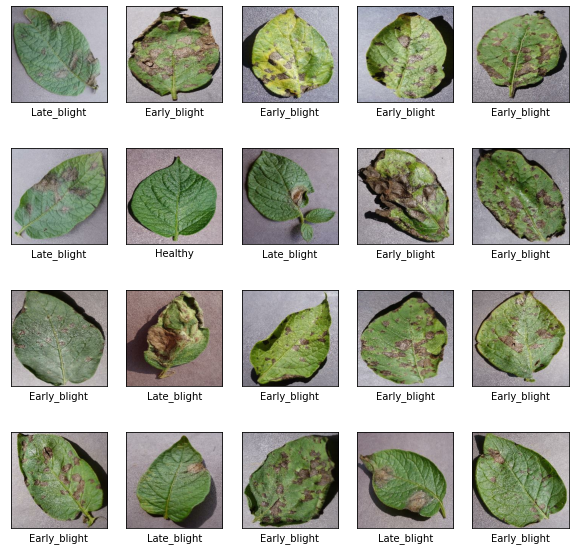

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i].numpy().astype('int'), cmap=plt.cm.binary)
    plt.xlabel(classes[label[i]])
  plt.show()

Loading validation and test dataset from the directory again through "image_dataset_from_directory" providing the default batch size and image size

In [ ]:
df_vali = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/potato/dataset_pot/val',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,
)

Found 215 files belonging to 3 classes.


In [ ]:
df_test = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/potato/dataset_pot/test',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,)

Found 216 files belonging to 3 classes.


## Data preprocessing

Using tensorflows preprocessing layers

1. Resizing layers- used to change image length and widhth to (256,256)

2. Rescaling layers- to stanadradize the data

3. RandomZoom layers - to randomly zoom in or out on each axis of an image independently

In [ ]:
data_preprocessing = tf.keras.Sequential([

                                layers.experimental.preprocessing.Resizing(256,256),
                                layers.experimental.preprocessing.Rescaling(1./255, input_shape= (256,256,3)),
                                layers.experimental.preprocessing.RandomZoom(0.2)

                    ])

In [ ]:
data_augumentation = tf.keras.Sequential([
                                layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                layers.experimental.preprocessing.RandomRotation(0.2),

                    ])

Before using data augumentation on the dataset, I have tried to visualisize how it looks with this particular dataset

Using RandomFlip and RandomRotation layers

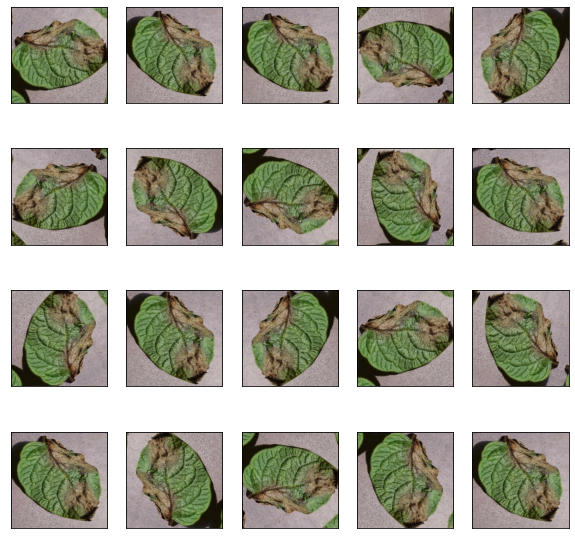

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    augmented_images = data_augumentation(image)
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[0].numpy().astype('int'), cmap=plt.cm.binary)
  plt.show()

## Model building

Within the sequential layers having

1. data_preprocessing as the first layer consisting of resizing, rescaling and randomzoom preprocessing layers

2. Secondly having stack of convolutional 2D and Maxpooling layers. In this case, using 4 layers of each ( tried different counts), the convolutional layers take filters to find the features of the images and its size which is given by the kernel_size and an activation function

* The first convolutional layer takes the input shape (256,256,3) which is image height, width and the rgb mode , 32 filters with size of 3* 3 and relu as its activation function. And the following convolutional layers take same kernel size and activation function but the filter value as 64

* Using maxpooling layers as it extracts the main and sharp features from the images providing size of 3 * 3

3. Within the dense network

* Having a flatten layer, which helps to reduce the dimensionality of the input to single dimension

* Followed by flatten layer having two deep layers where the first layer has 64 neurons and relu as its activation function, and the second is the output layer with 37 output categories and softmax as its activation function since it normalises the output

* As CNN layers are used, there is not much necessary to use more dense layers CNN layers itself does the job

* Have also tried different optimizer values

* Using SparseCategoricalCrossentropy as loss function, since the traget value is not onehotencoded, also setting the from_logits = False as use softmax functione loss is normalised

* Using accuracy as the metric to evaluate the model

* Have built the model within a function to try different optimizers

In [ ]:
def check_opt(optimizers):

  model = models.Sequential([
    data_preprocessing,
    data_augumentation,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dense(37, activation = 'softmax'),

    ])


  model.compile(optimizer= optimizers,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

  return model

* Trying out the following five optimizers and storing it in an empty lists

* Looping through all the optimizers and applying to the function

* Using model.fit to train the training dataset and storing it in a variable. The fit model returns an history callback object which could be called to return the loss and accuracy values

* Appending the final epoch results to the list. Here since I use only 5 epochs appending the fifth loss and accuracy value with index value 4

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [ ]:
train_acc = []
val_acc = []
train_loss =[]
val_loss = []

In [ ]:
for i in optimizers:
  model = check_opt(i)
  print('With optimizer:'+ i)


  history = model.fit(df_train, epochs= 5, batch_size = 32,validation_data= df_vali)

  train_acc.append(history.history['accuracy'][4])
  val_acc.append( history.history['val_accuracy'][4])

  train_loss.append(history.history['loss'][4])
  val_loss.append(history.history['val_loss'][4])

With optimizer:Adadelta
Epoch 1/5
54/54 [==============================] - 165s 3s/step - loss: 3.6084 - accuracy: 0.0000e+00 - val_loss: 3.5793 - val_accuracy: 0.0000e+00
Epoch 2/5
54/54 [==============================] - 116s 2s/step - loss: 3.5585 - accuracy: 0.0000e+00 - val_loss: 3.5244 - val_accuracy: 0.0000e+00
Epoch 3/5
54/54 [==============================] - 116s 2s/step - loss: 3.5118 - accuracy: 0.0128 - val_loss: 3.4716 - val_accuracy: 0.1674
Epoch 4/5
54/54 [==============================] - 116s 2s/step - loss: 3.4636 - accuracy: 0.2719 - val_loss: 3.4156 - val_accuracy: 0.4930
Epoch 5/5
54/54 [==============================] - 116s 2s/step - loss: 3.4113 - accuracy: 0.5026 - val_loss: 3.3516 - val_accuracy: 0.5163
With optimizer:Adagrad
Epoch 1/5
54/54 [==============================] - 117s 2s/step - loss: 2.5076 - accuracy: 0.3539 - val_loss: 1.0092 - val_accuracy: 0.4698
Epoch 2/5
54/54 [==============================] - 116s 2s/step - loss: 0.9509 - accuracy: 0.4956

* It is observed that adam optimizer performs better

* I have tried to train the model with 10 epochs, but the accuracies were consitent even from the third epoch and did not have any change till 10th. So i decided to run only for 5 epochs.

* Created a dataframe out of these results to compare the accuracy and loss values

In [ ]:
data = {'Optimizers': ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'], 'Training_accuracy': [train_acc[0],train_acc [1],train_acc [2],train_acc [3],train_acc [4]],
         'Training_loss': [train_loss[0],train_loss[1],train_loss[2],train_loss[3],train_loss[4]],
         'Validation_accuracy' : [val_acc[0],val_acc[1],val_acc[2],val_acc[3],val_acc[4]],

         'Validation_loss': [val_loss[0],val_loss[1],val_loss[2],val_loss[3],val_loss[4]],
                                                                                              }

df = pd.DataFrame(data)

In [ ]:
df

,Optimizers,Training_accuracy,Training_loss,Validation_accuracy,Validation_loss
0,Adadelta,0.502615,3.411250,0.516279,3.351572
1,Adagrad,0.552005,0.873510,0.479070,0.882518
2,Adam,0.873329,0.297284,0.925581,0.237606
3,RMSprop,0.861127,0.358046,0.795349,0.569786
4,SGD,0.572342,0.876666,0.465116,1.112441



* Since adam gives better accuracy training the model and checking for accuracy with the same

In [ ]:
model = models.Sequential([
    data_preprocessing,
    data_augumentation,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=( 256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dropout(0.5),
    layers.Dense(3, activation = 'softmax'),

])
model.build(input_shape = (32,256,256,3))

model.summary() shows all the layers (networks) used in the model


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 84, 84, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 82, 82, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 27, 27, 64)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

Using train dataset to fit the model providing the validatioin dataset to validate with 10 epochs.

I am storing the results within the history variable which could be used to visualise the results

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [ ]:
early_stop = EarlyStopping(monitor= 'val_loss',patience = 3, restore_best_weights= True)
model_chk = ModelCheckpoint(filepath='/content/drive/MyDrive/thesis_crop_dis_pre/cabb_save_model.hdf5',monitor= 'val_loss',save_best_only= True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3, factor = 0.1)

In [ ]:
history = model.fit(df_train, epochs= 30, batch_size = 32, validation_data= df_vali, callbacks = [early_stop,model_chk,lr_rate],verbose = 2)

Epoch 1/30
54/54 - 318s - loss: 0.8420 - accuracy: 0.5706 - val_loss: 0.7064 - val_accuracy: 0.6837 - lr: 0.0010 - 318s/epoch - 6s/step
Epoch 2/30
54/54 - 5s - loss: 0.5577 - accuracy: 0.7926 - val_loss: 0.7979 - val_accuracy: 0.6884 - lr: 0.0010 - 5s/epoch - 87ms/step
Epoch 3/30
54/54 - 5s - loss: 0.4937 - accuracy: 0.8239 - val_loss: 0.4470 - val_accuracy: 0.8372 - lr: 0.0010 - 5s/epoch - 92ms/step
Epoch 4/30
54/54 - 5s - loss: 0.4274 - accuracy: 0.8315 - val_loss: 0.3462 - val_accuracy: 0.8326 - lr: 0.0010 - 5s/epoch - 88ms/step
Epoch 5/30
54/54 - 5s - loss: 0.3656 - accuracy: 0.8553 - val_loss: 0.3406 - val_accuracy: 0.8884 - lr: 0.0010 - 5s/epoch - 87ms/step
Epoch 6/30
54/54 - 5s - loss: 0.3213 - accuracy: 0.8698 - val_loss: 0.7322 - val_accuracy: 0.7721 - lr: 0.0010 - 5s/epoch - 86ms/step
Epoch 7/30
54/54 - 5s - loss: 0.2616 - accuracy: 0.8989 - val_loss: 0.6225 - val_accuracy: 0.8140 - lr: 0.0010 - 5s/epoch - 87ms/step
Epoch 8/30
54/54 - 5s - loss: 0.2235 - accuracy: 0.9169 - va

## Model evaluation

* Evaluating the model by comparing the accuracy and loss in training and validation dataset using callback function(history) and visualizing with matplotlib

In [ ]:
train_accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

* Plotting training and validation accuracy and loss values with respect to each epochs

## Evaluating the test data


* Using evaluate method to evaluate the test datset and checking predicted and the actual label using predict function

Text(0, 0.5, 'Loss')

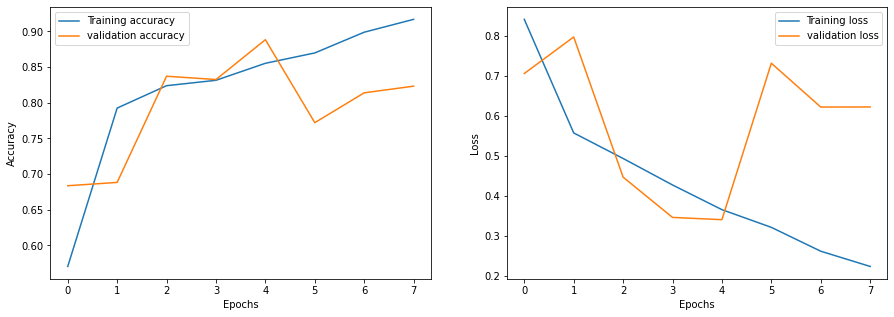

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(8),train_accu,label= 'Training accuracy')
plt.plot(range(8),val_accu,label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(8),train_loss,label= 'Training loss')
plt.plot(range(8),val_loss,label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
model.evaluate(df_test)

7/7 [==============================] - 36s 59ms/step - loss: 0.3003 - accuracy: 0.8981


[0.30029910802841187, 0.8981481194496155]

actual label Late_blight
predicted_label Late_blight


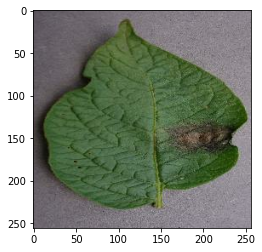

In [ ]:
for image, label in df_test.take(1):
  plt.imshow(image[1].numpy().astype('int'))
  print('actual label', classes[label[1]])

  prediction = model.predict(image)
  print('predicted_label',classes[np.argmax(prediction[1])] )


## Saving keras model

In [ ]:
save_path = '/content/drive/MyDrive/thesis_crop_dis_pre/pot_save_model.h5'
model.save(save_path)

model = keras.models.load_model(save_path)